<a href="https://colab.research.google.com/github/mehvishhkhan/DAV/blob/main/DAV_Exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Aim:**
To perform Linear Regression in Python as well as R.

# **Tasks to be performed:**
1. Explore Python Libraries: scikit-learn, matplotlib, numpy, pandas.
2. Explore R Libraries: ggplot2, ml.

# **Simple Linear Regression in python**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/2018.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [4]:
data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112449
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096343
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.139000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


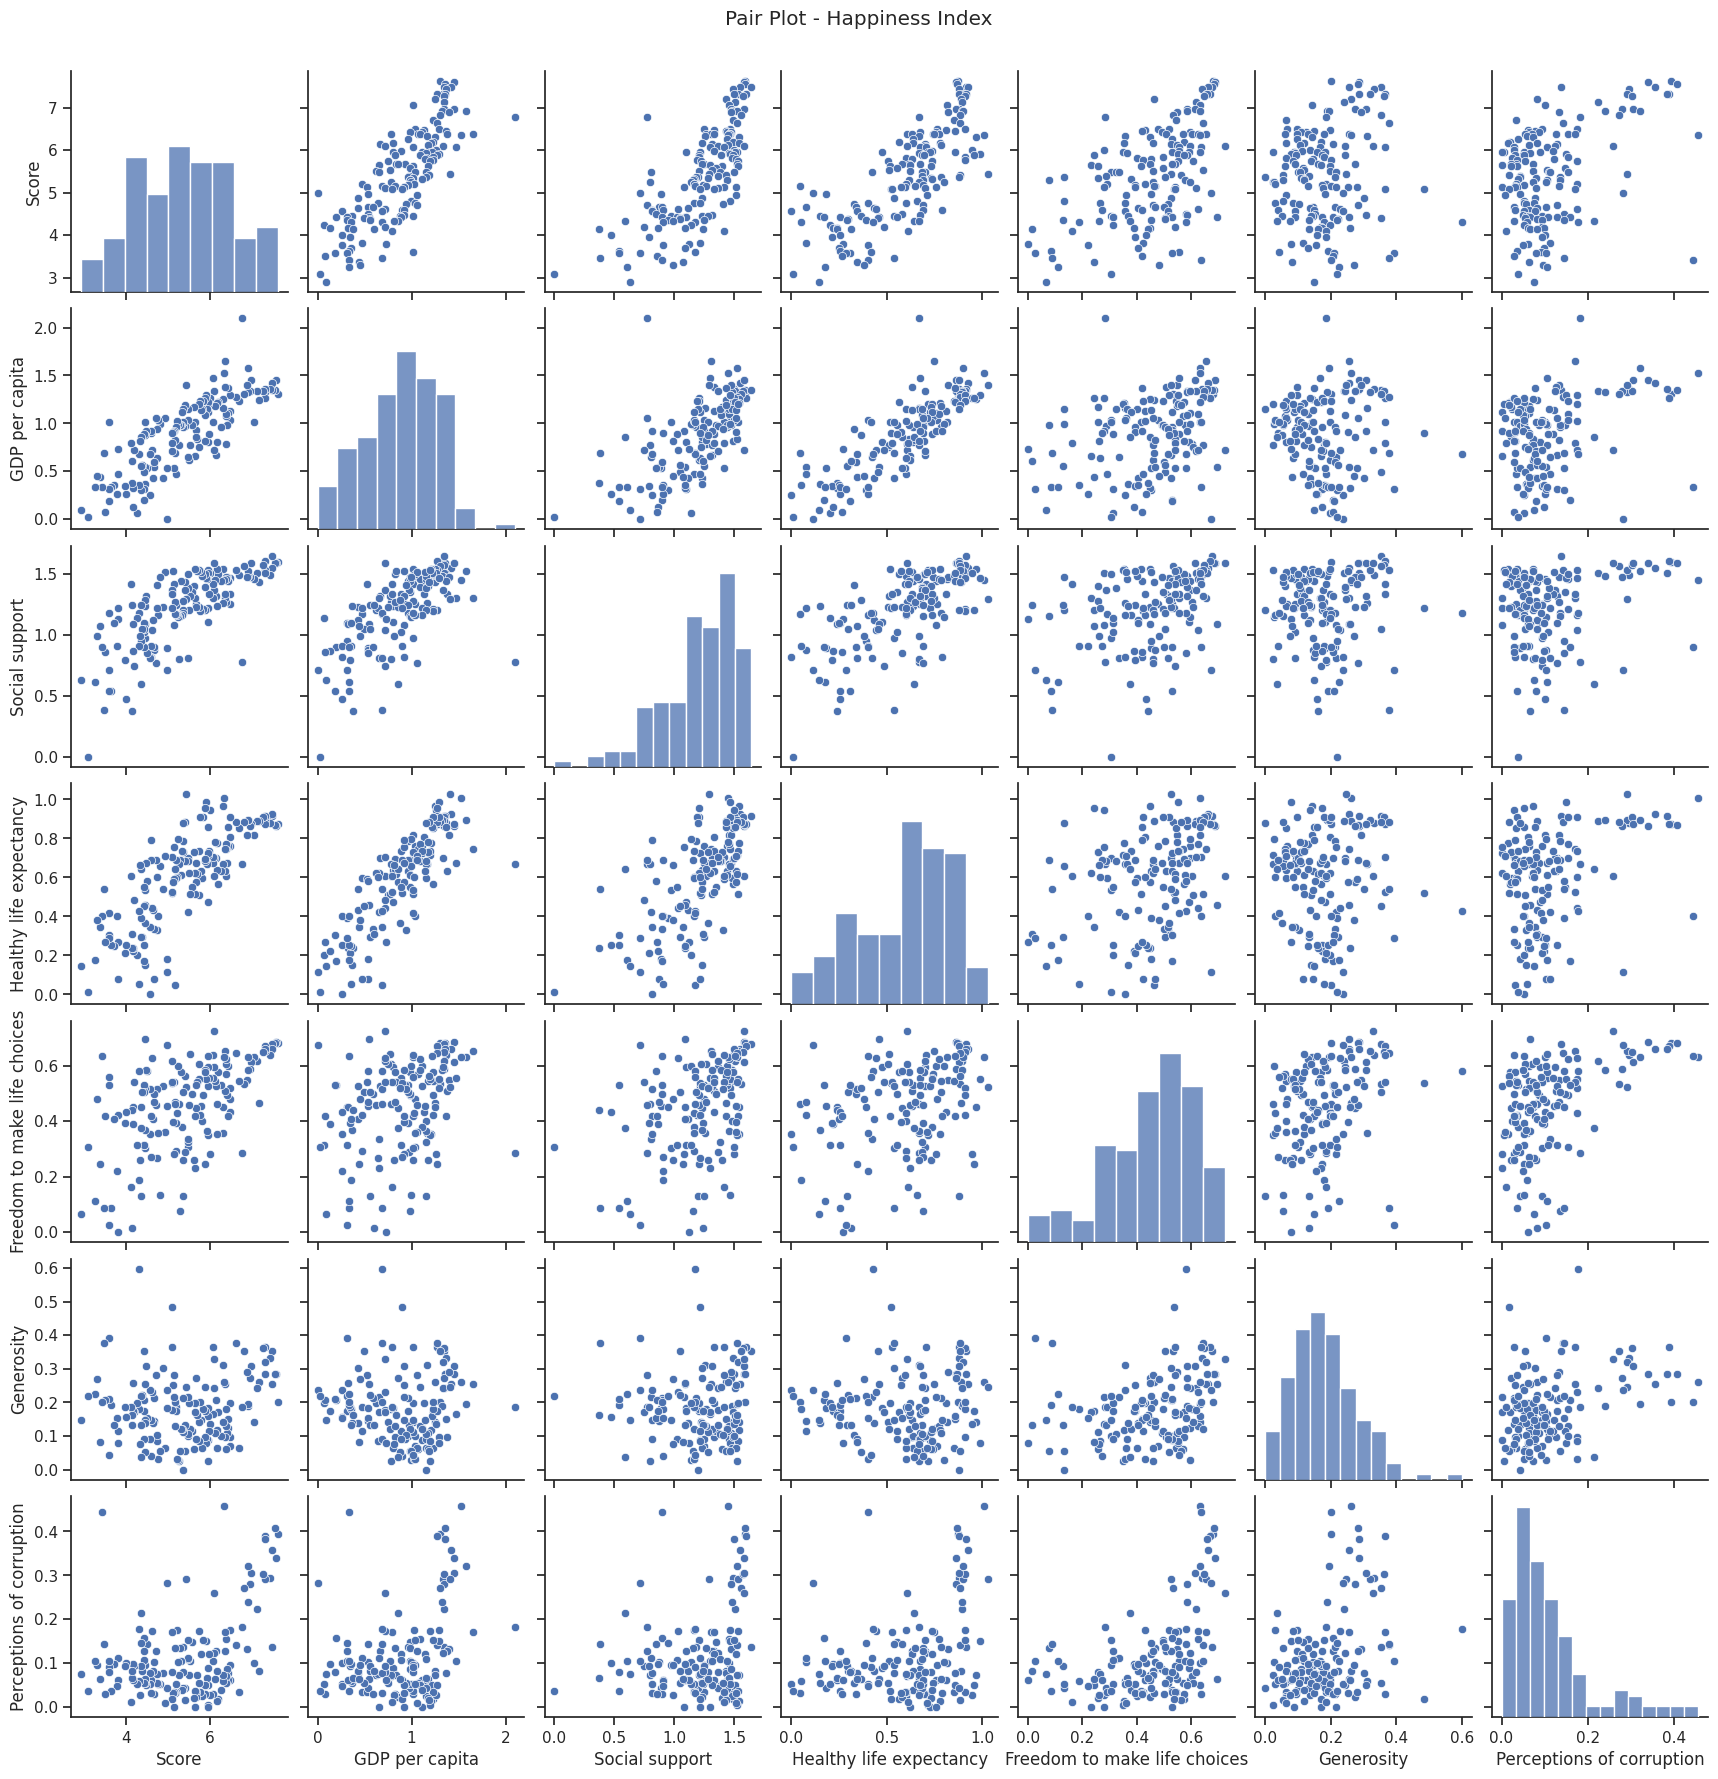

In [5]:
columns = ["Score","GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]
df = data[columns]

sns.set(style="ticks", color_codes=True)
pair_plot = sns.pairplot(df)
plt.suptitle('Pair Plot - Happiness Index', y=1.02)
plt.show()

In [14]:
x = df["GDP per capita"].values.reshape(-1,1)
y = df["Score"].values.reshape(-1,1)
print(x.shape)
print(y.shape)

(156, 1)
(156, 1)


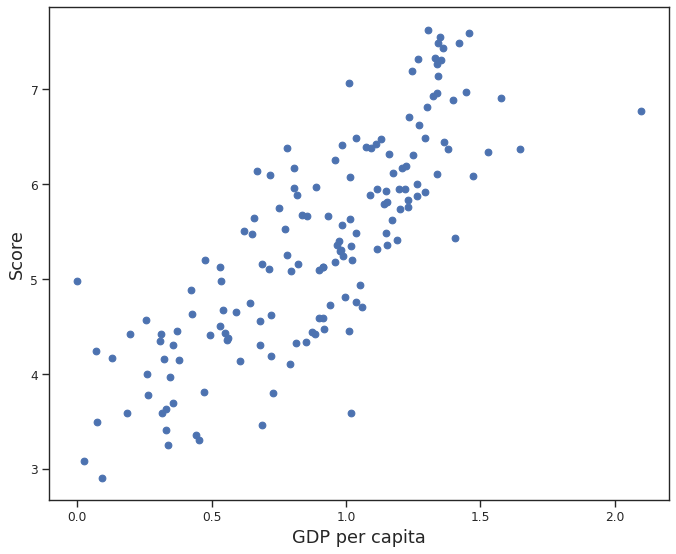

In [15]:
plt.figure(figsize=(10,8),dpi = 80)
plt.scatter(x,y)
plt.xlabel("GDP per capita",size = 16)
plt.ylabel("Score",size = 16)
plt.show()

In [16]:
mask_per_capita = (df["GDP per capita"] >= 1) & (df["GDP per capita"] <= 1.25)
mask_score = df["Score"] < 4


filtered_df = df[mask_per_capita & mask_score]


filtered_df

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
145,3.59,1.017,1.174,0.417,0.557,0.042,0.092


In [17]:
df.drop([145], axis=0, inplace=True)

<ipython-input-17-9481f6ef5605>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([145], axis=0, inplace=True)


In [18]:
mask_per_capita = (df["GDP per capita"] >= 2) & (df["GDP per capita"] <= 2.25)
mask_score = df["Score"] < 7


filtered_df = df[mask_per_capita & mask_score]


filtered_df

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
19,6.774,2.096,0.776,0.67,0.284,0.186,0.182


In [19]:
df.drop([19], axis=0, inplace=True)

<ipython-input-19-890fb6c17e2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([19], axis=0, inplace=True)


In [23]:
mask_per_capita = (df["GDP per capita"] >= -1) & (df["GDP per capita"] <= 0)
mask_score = df["Score"] < 5


filtered_df = df[mask_per_capita & mask_score]


filtered_df

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
97,4.982,0.0,0.712,0.115,0.674,0.238,0.282


In [24]:
df.drop([97], axis=0, inplace=True)

<ipython-input-24-565bc70474b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([97], axis=0, inplace=True)


In [25]:
x = df["GDP per capita"].values.reshape(-1,1)
y = df["Score"].values.reshape(-1,1)
print(x.shape)
print(y.shape)

(153, 1)
(153, 1)


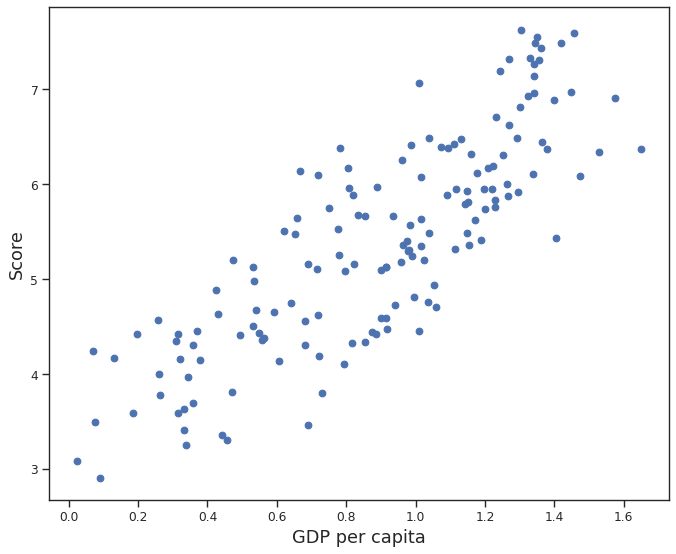

In [26]:
plt.figure(figsize=(10,8),dpi = 80)
plt.scatter(x,y)
plt.xlabel("GDP per capita",size = 16)
plt.ylabel("Score",size = 16)
plt.show()

Splitting the data and model training

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [32]:
y_predict = model.predict(x_test)
y_predict.shape

(39, 1)

In [34]:
x_test = np.reshape(x_test,(x_test.shape[0]))
y_test = np.reshape(y_test,(y_test.shape[0]))
y_predict = np.reshape(y_predict,(y_predict.shape[0]))
df1 = pd.DataFrame({"X":x_test,"Actual":y_test,"Predict":y_predict})
df1

,X,Actual,Predict
0,0.989,5.246,5.625253
1,0.474,5.199,4.318545
2,1.054,4.933,5.790177
3,0.370,4.447,4.054667
4,1.093,6.379,5.889132
5,1.010,4.456,5.678536
6,0.965,5.358,5.564358
7,0.982,5.302,5.607492
8,1.301,6.814,6.416889
9,1.324,6.927,6.475247


In [35]:
y_plot = model.predict(x)

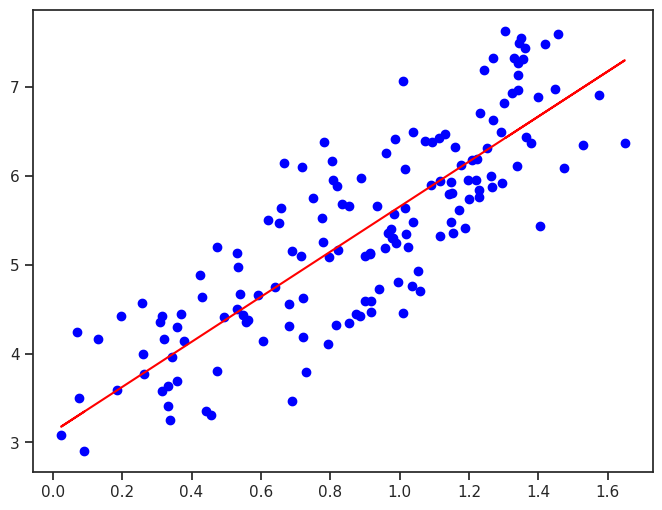

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_plot, color='red', label='Linear Regression Line')

In [37]:
from sklearn import metrics

In [38]:
print("Explaind variance:", metrics.explained_variance_score(y_test,y_predict))
print("Max error:",metrics.max_error(y_test,y_predict))
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_predict))
print("Mean squared error:",metrics.mean_squared_error(y_test,y_predict,squared=True))
print("R-2 score:",metrics.r2_score(y_test,y_predict))

Explaind variance: 0.5342739694286951
Max error: 1.393463940035832
Mean absolute error: 0.5491393999108403
Mean squared error: 0.4202562019428952
R-2 score: 0.5323626823424537


# **Simple Linear Regression in R**

In [26]:
install.packages('tidyverse')
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [27]:
library(tidyverse)
library(caret)

In [28]:
data <- read.csv("/content/2018.csv")

In [29]:
str(data)

'data.frame':	156 obs. of  9 variables:
 $ Overall.rank                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Country.or.region           : chr  "Finland" "Norway" "Denmark" "Iceland" ...
 $ Score                       : num  7.63 7.59 7.55 7.5 7.49 ...
 $ GDP.per.capita              : num  1.3 1.46 1.35 1.34 1.42 ...
 $ Social.support              : num  1.59 1.58 1.59 1.64 1.55 ...
 $ Healthy.life.expectancy     : num  0.874 0.861 0.868 0.914 0.927 0.878 0.896 0.876 0.913 0.91 ...
 $ Freedom.to.make.life.choices: num  0.681 0.686 0.683 0.677 0.66 0.638 0.653 0.669 0.659 0.647 ...
 $ Generosity                  : num  0.202 0.286 0.284 0.353 0.256 0.333 0.321 0.365 0.285 0.361 ...
 $ Perceptions.of.corruption   : num  0.393 0.34 0.408 0.138 0.357 0.295 0.291 0.389 0.383 0.302 ...


In [30]:
summary(data)

  Overall.rank    Country.or.region      Score       GDP.per.capita  
 Min.   :  1.00   Length:156         Min.   :2.905   Min.   :0.0000  
 1st Qu.: 39.75   Class :character   1st Qu.:4.454   1st Qu.:0.6162  
 Median : 78.50   Mode  :character   Median :5.378   Median :0.9495  
 Mean   : 78.50                      Mean   :5.376   Mean   :0.8914  
 3rd Qu.:117.25                      3rd Qu.:6.168   3rd Qu.:1.1978  
 Max.   :156.00                      Max.   :7.632   Max.   :2.0960  
 Social.support  Healthy.life.expectancy Freedom.to.make.life.choices
 Min.   :0.000   Min.   :0.0000          Min.   :0.0000              
 1st Qu.:1.067   1st Qu.:0.4223          1st Qu.:0.3560              
 Median :1.255   Median :0.6440          Median :0.4870              
 Mean   :1.213   Mean   :0.5973          Mean   :0.4545              
 3rd Qu.:1.463   3rd Qu.:0.7772          3rd Qu.:0.5785              
 Max.   :1.644   Max.   :1.0300          Max.   :0.7240              
   Generosity     Pe

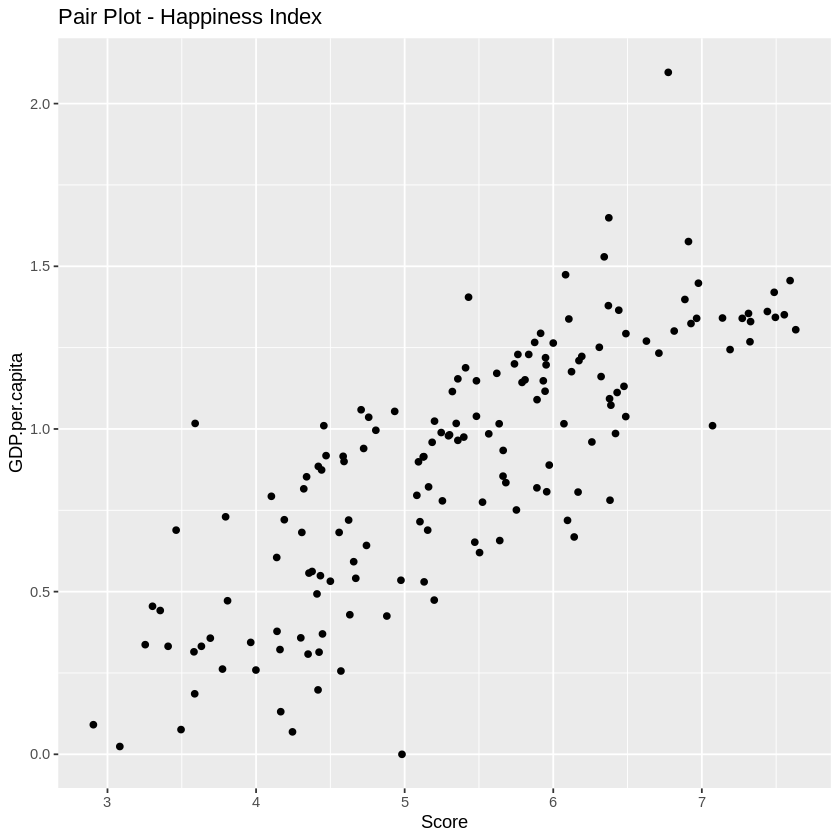

In [31]:
columns <- c("Score", "GDP.per.capita", "Social.support", "Healthy.life.expectancy", "Freedom.to.make.life.choices", "Generosity", "Perceptions.of.corruption")
df <- data[columns]

pair_plot <- ggplot(df, aes(x = Score, y = GDP.per.capita)) +
  geom_point() +
  labs(title = "Pair Plot - Happiness Index")

print(pair_plot)

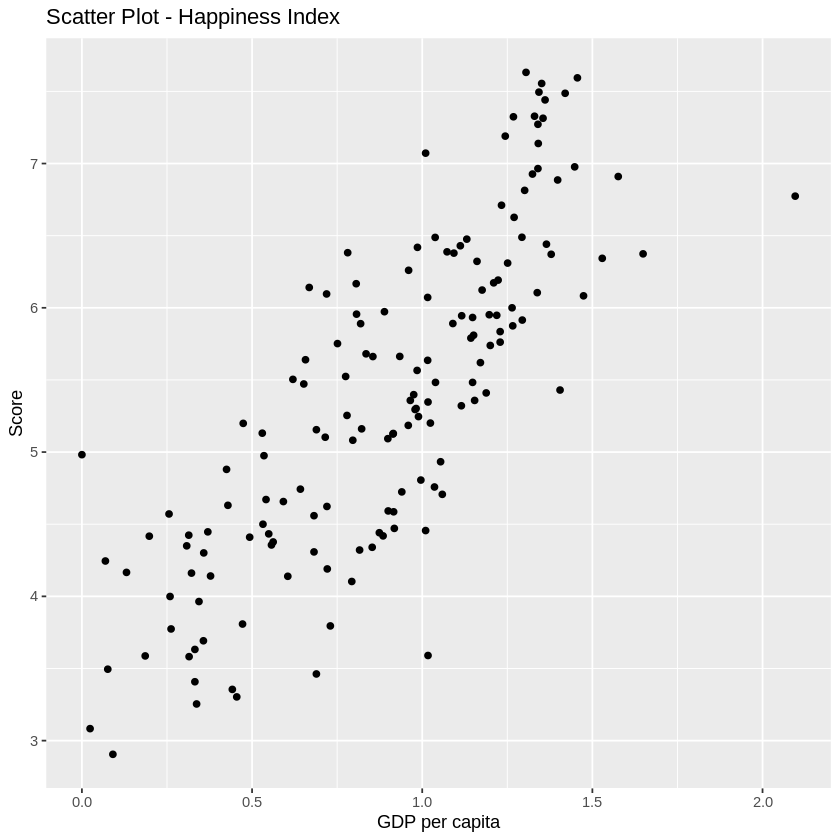

In [32]:
scatter_plot <- ggplot(df, aes(x = GDP.per.capita, y = Score)) +
  geom_point() +
  labs(title = "Scatter Plot - Happiness Index", x = "GDP per capita", y = "Score")

print(scatter_plot)


In [42]:
filtered_df <- df %>% filter(GDP.per.capita >= 1 & GDP.per.capita <= 1.25 & Score < 4)

# Dropping rows based on index
df <- df[-c(145), ]

In [43]:
filtered_df <- df %>% filter(GDP.per.capita >= 2 & GDP.per.capita <= 2.25 & Score < 7)
df <- df[-c(19), ]

In [44]:
filtered_df <- df %>% filter(GDP.per.capita >= -1 & GDP.per.capita <= 0 & Score < 5)
df <- df[-c(97), ]

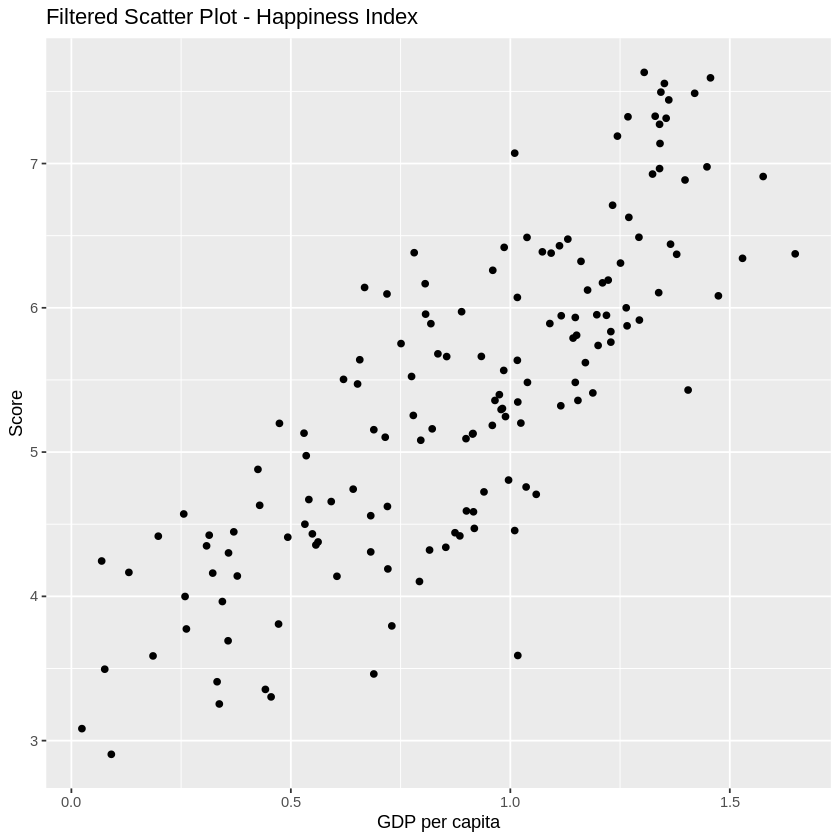

In [45]:
scatter_plot_filtered <- ggplot(df, aes(x = GDP.per.capita, y = Score)) +
  geom_point() +
  labs(title = "Filtered Scatter Plot - Happiness Index", x = "GDP per capita", y = "Score")

print(scatter_plot_filtered)

In [46]:
set.seed(42)  # Set seed for reproducibility
split <- createDataPartition(df$Score, p = 0.75, list = FALSE)
train_data <- df[split, ]
test_data <- df[-split, ]

In [47]:
model <- lm(Score ~ GDP.per.capita, data = train_data)

In [48]:
y_predict <- predict(model, newdata = test_data)

In [49]:
metrics <- data.frame(
  Explained_Variance = R2(y_predict, test_data$Score),
  Max_Error = max(abs(y_predict - test_data$Score)),
  MAE = mean(abs(y_predict - test_data$Score)),
  MSE = mean((y_predict - test_data$Score)^2),
  R2_Score = cor(y_predict, test_data$Score)^2
)

print(metrics)

  Explained_Variance Max_Error       MAE       MSE  R2_Score
1          0.6165145   1.41557 0.5826067 0.4774398 0.6165145


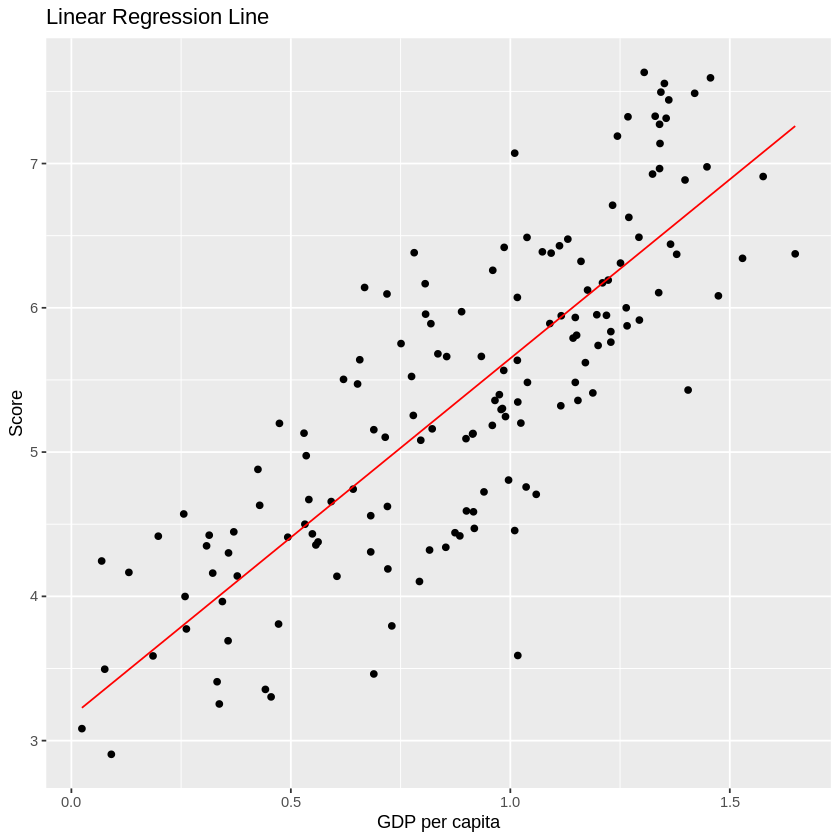

In [50]:
plot_reg_line <- ggplot(df, aes(x = GDP.per.capita, y = Score)) +
  geom_point() +
  geom_line(data = data.frame(GDP.per.capita = df$GDP.per.capita, Score = predict(model, newdata = df)),
            aes(x = GDP.per.capita, y = Score),
            color = "red") +
  labs(title = "Linear Regression Line", x = "GDP per capita", y = "Score")

print(plot_reg_line)

# **Conclusion:**
1. Understood the concept of Simple Linear Regression.
2. Explored the packages in Python and R.
3. Performed Simple Linear Regression using the Libraries in Python and R.